In [1]:
# Dependencies
import pandas as pd
import geopandas as gpd
import shapely as shp
import matplotlib.pyplot as plt
import fns as f

In [2]:
# Read California state boundary geojson
gdf = gpd.read_file('../outputs/geojson/ca_boundary.geojson')
gdf

,gid,arealand,division,intptlat,name,objectid,areawater,intptlon,oid,funcstat,...,state,statens,centlat,basename,mtfcc,region,lsadc,geoid,geo_point_2d,geometry
0,48,-222385618,9,37.155177,California,14,-1011556647,-119.543418,239405626,A,...,06,01779778,37.154735,California,G4000,4,00,06,"{'lon': -119.663749804, 'lat': 37.2153570137}","MULTIPOLYGON (((-124.13656 41.46445, -124.1441..."


<Axes: >

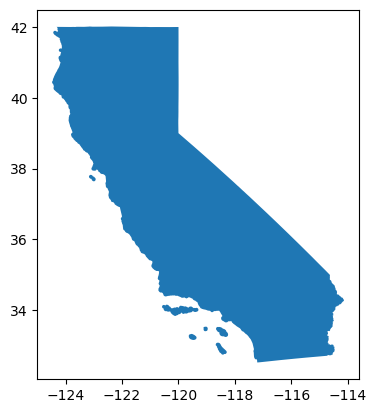

In [3]:
# Show shape
gdf.plot()

In [38]:
# Create grid size based on GPM IMERG cell size
grid_cells = []
grid_size = 0.1
for x in range(-12445,-11405+10,10):
    for y in range(3245, 4195+10,10):
        grid_cells.append(f.polysquare(x,y,5,100))
cells = gpd.GeoDataFrame(grid_cells, columns=['geometry'], crs=4326)
cells

,geometry
0,"POLYGON ((-124.40000 32.40000, -124.40000 32.5..."
1,"POLYGON ((-124.40000 32.50000, -124.40000 32.6..."
2,"POLYGON ((-124.40000 32.60000, -124.40000 32.7..."
3,"POLYGON ((-124.40000 32.70000, -124.40000 32.8..."
4,"POLYGON ((-124.40000 32.80000, -124.40000 32.9..."
...,...
10075,"POLYGON ((-114.00000 41.50000, -114.00000 41.6..."
10076,"POLYGON ((-114.00000 41.60000, -114.00000 41.7..."
10077,"POLYGON ((-114.00000 41.70000, -114.00000 41.8..."
10078,"POLYGON ((-114.00000 41.80000, -114.00000 41.9..."


In [39]:
# Creat boolean mask for grid cells based on intersect with CA boundary shape
mask = cells.intersects(gdf['geometry'][0])
mask

0        False
1        False
2        False
3        False
4        False
         ...  
10075    False
10076    False
10077    False
10078    False
10079    False
Length: 10080, dtype: bool

In [40]:
# Create list of index for cells covering CA from mask
index = [i for (i, v) in zip(range(0,len(mask)), mask) if v]

In [41]:
# Write list of indices to csv file
pd.Series(index,name='keep').to_csv('../outputs/geojson/ca_grid_index_keep.csv',index=False)

In [42]:
# Create list of index for cells to be dropped from mask
drop = [i for (i, v) in zip(range(0,len(mask)), mask) if not v]

In [43]:
# Write list of indices to csv file
pd.Series(drop,name='drop').to_csv('../outputs/geojson/ca_grid_index_drop.csv',index=False)

<Axes: >

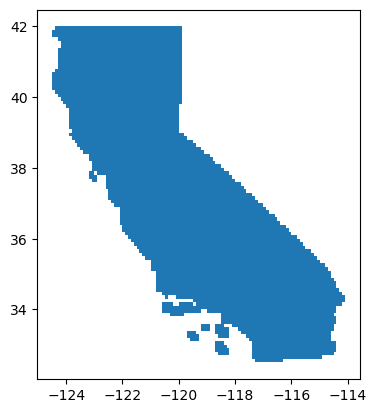

In [44]:
# Filter grid cells by index using drop list
ca_cells = cells.drop(index=drop)
ca_cells.plot()

In [45]:
# Write CA cells to geojson file
ca_cells.to_file('../outputs/geojson/ca_grid.geojson', driver='GeoJSON')

In [46]:
# Read CA cells file to check
ca_grid = gpd.read_file('../outputs/geojson/ca_grid.geojson')

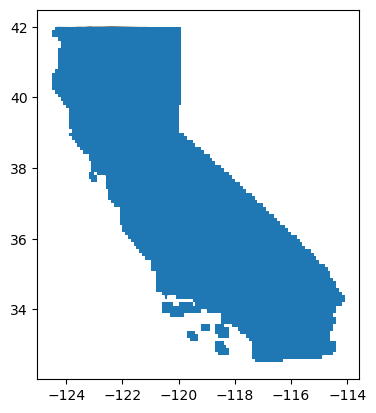

In [47]:
ax=ca_grid.plot( zorder=2)
gdf.plot(ax=ax, color='black', zorder=1)
plt.show()

In [50]:
f.CAbounds()

[-124.482003000119, 32.5288320002052, -114.131210999644, 42.0095030001829]

In [71]:
bd = [ca_cells['geometry'].bounds['minx'].min()-0.1,
      ca_cells['geometry'].bounds['miny'].min()-0.1,
      ca_cells['geometry'].bounds['maxx'].max()+0.1,
      ca_cells['geometry'].bounds['maxy'].max()+0.1]
bd

[-124.6, 32.4, -114.0, 42.1]

In [72]:
bd_shp = shp.geometry.box(bd[0],bd[1],bd[2],bd[3])

In [73]:
bd_gdf = gpd.GeoDataFrame([bd_shp], columns=['geometry'], crs=4326)

In [75]:
bd_gdf.to_file('../outputs/geojson/ca_bbox.geojson', driver='GeoJSON')